In [ ]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.stem import WordNetLemmatizer

In [2]:
def concat(requi, responsi):
    if requi is not None and responsi is not None:
       conc = requi + responsi
       return conc

In [3]:
url = "https://api.hh.ru/vacancies?text=data scientist"

payload={}
headers = {
  'Cookie': '__ddg1_=n20aiiOvt7O5zxtEpATf'
}

response = requests.request("GET", url, headers=headers, data=payload)
data = response.json()

In [35]:
snippets = [elem['snippet'] for elem in data['items']] 
text_snippets = [concat(snip['requirement'], snip['responsibility']) for snip in snippets]
text_snippets.pop(10)
text = ' '.join(text_snippets).replace('<highlighttext>', '').replace('</highlighttext>',
                           '').replace('данных', '').replace('и', '').replace('Знане',
                           '').replace('в', '').replace('с', '').replace('опыт',
                           '').replace('для', '').replace('таттк', '').replace('облат', '')


In [36]:
lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
lemmatiz_text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

(-0.5, 399.5, 199.5, -0.5)

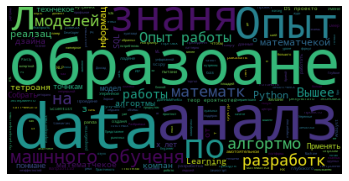

In [38]:
cloud = WordCloud(max_font_size=500).generate(lemmatiz_text)
plt.figure(frameon=False)
plt.imshow(cloud)
plt.axis('off')